In [1]:
%run convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Pipelines

# from sklearn.pipeline import Pipeline

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 6)
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])
pipe.fit(X_train, y_train)
print('Train score: %.2f' % pipe.score(X_train, y_train))
print('Test score: %.2f' % pipe.score(X_test, y_test))

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train score: 0.96
Test score: 0.94


# Using pipelines in Grid searches

<p class = 'warning'>Parameter name in Pipeline: <code>{model_name}__{parameter_name}</code></p>

In [23]:
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])
grid_params = {
    'svm__C' : [.01, .1, 1, 10, 100],
    'svm__gamma' : [.01, .1, 1, 10, 100]
}
grid = GridSearchCV(pipe, grid_params, cv = 5)
grid.fit(X_train, y_train)
print('best parameter(s):{}'.format(grid.best_params_))
print('Best validation score: %.2f' % grid.best_score_)
print('Test score: %.2f' % grid.score(X_test, y_test))

best parameter(s):{'svm__C': 1, 'svm__gamma': 1}
Best validation score: 0.98
Test score: 0.97


# Conveninent Pipeline: <code>make_pipeline</code>

In [24]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(MinMaxScaler(), SVC())
pipe.fit(X_train, y_train)
'Test score: %.2f' % pipe.score(X_test, y_test)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'Test score: 0.94'

<p class = 'note'>The steps are named <u>minmaxscaler</u> and <u>svc</u>. In general, the step names are just lowercase versions of the class names. If multiple steps have the same class, a number is
appended:</p>

In [26]:
#Whiten in PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pipe = make_pipeline(StandardScaler(), PCA(n_components = 2), StandardScaler())
pipe.steps

[('standardscaler-1',
  StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('pca',
  PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
      svd_solver='auto', tol=0.0, whiten=False)),
 ('standardscaler-2',
  StandardScaler(copy=True, with_mean=True, with_std=True))]

# Accessing Step Attributes

<h2 class = 'tag'  style = 'text-align: center;'>How do we get the model at the i<sup>th</sup> step?</h2>

<p class = 'note'>Solution:<br>
     via the <code>named_steps</code> attribute, which is a dictionary
from the step names to the estimators: <span class = 'highlight'>
    <br>
    e.g: <code>pipe.named_steps['pca'].components_</code></span>

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
#get the Principle components:
pipe.fit(iris.data)

pipe.named_steps['pca']

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pipe.named_steps['pca'].components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

# Accessing Attributes in a Grid-Searched Pipeline

In [39]:
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(), LogisticRegression(solver = 'lbfgs'))
pipe.steps

[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('logisticregression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False))]

In [34]:
grid_params = {'logisticregression__C' : [.001, .01, .1, 1, 10, 100]}
grid = GridSearchCV(pipe, grid_params, cv = 5)
grid.fit(X_train, y_train)

grid.best_estimator_

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

<p class = 'note'>we can see that <code>grid.best_estimator_</code> returns a <code>Pipeline</code>.<br>
So to access a model we just need to use the attribute <code>named_steps['model_name']</code> as discussed above.
</p>

In [40]:
#get the coefficients of Logistic Regression model
grid.best_estimator_.named_steps['logisticregression'].coef_

array([[-0.4856842 , -0.40206891, -0.45299539, -0.52024407, -0.25686117,
         0.36039283, -0.65009703, -0.97122049,  0.04646819,  0.22464176,
        -0.95031614, -0.06044277, -0.51216957, -0.95083589, -0.16133146,
         0.69379119,  0.15418147, -0.34888216,  0.30055852,  0.59813117,
        -0.86057642, -1.02317914, -0.74783105, -0.83599892, -0.71470772,
        -0.05355827, -0.70342769, -0.98714089, -0.71414986, -0.49638629]])

# Grid-Searching Preprocessing Steps and Model Parameters

<p class = 'note'>How do we find out which degree is the best for a Polynomial Regressor on our dataset?</p>

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge

In [43]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 6)

In [45]:
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

In [48]:
grid_params = {
    'polynomialfeatures__degree' : [1,2,3],
    'ridge__alpha' : [.001, .01, .1, 1, 10, 100]
}

grid = GridSearchCV(pipe, grid_params, cv = 5)


In [49]:
grid.fit(X_train, y_train)
print('Best validation score: %.2f' % grid.best_score_)
print('Test score: %.2f' % grid.score(X_test, y_test))

Best validation score: 0.84
Test score: 0.79


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [50]:
grid.best_params_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 10}

In [54]:
df = pd.DataFrame(grid.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.120287,0.240574,0.006241,0.012482,1,0.001,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.658149,0.712600,0.715702,0.742097,0.774451,0.720458,0.038292,12
1,0.003124,0.006249,0.000000,0.000000,1,0.01,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.658138,0.712605,0.715730,0.742095,0.774446,0.720461,0.038293,11
2,0.000000,0.000000,0.000000,0.000000,1,0.1,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.658028,0.712663,0.716012,0.742069,0.774399,0.720492,0.038303,10
3,0.000000,0.000000,0.000000,0.000000,1,1,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.656939,0.713200,0.718712,0.741783,0.773899,0.720767,0.038425,9
4,0.000000,0.000000,0.003124,0.006248,1,10,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.647243,0.715922,0.738234,0.737351,0.767794,0.721186,0.040528,8
5,0.000000,0.000000,0.003124,0.006248,1,100,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.600808,0.693489,0.767281,0.691514,0.732633,0.697051,0.055729,13
6,0.003125,0.006250,0.000000,0.000000,2,0.001,"{'polynomialfeatures__degree': 2, 'ridge__alph...",0.788582,0.853885,0.766794,0.754234,0.716975,0.776250,0.045272,7
7,0.003124,0.006248,0.000000,0.000000,2,0.01,"{'polynomialfeatures__degree': 2, 'ridge__alph...",0.787713,0.854658,0.764083,0.757883,0.720386,0.777094,0.044423,6
8,0.003124,0.006248,0.000000,0.000000,2,0.1,"{'polynomialfeatures__degree': 2, 'ridge__alph...",0.785327,0.837162,0.762174,0.800883,0.757079,0.788608,0.029016,5
9,0.003125,0.006249,0.003124,0.006249,2,1,"{'polynomialfeatures__degree': 2, 'ridge__alph...",0.788432,0.820958,0.781260,0.872669,0.807368,0.814155,0.032475,2


In [55]:
pivot = df.pivot(values = 'mean_test_score', index = 'param_polynomialfeatures__degree', columns = 'param_ridge__alpha')
pivot

param_ridge__alpha,0.001,0.01,0.1,1.0,10.0,100.0
param_polynomialfeatures__degree,,,,,,
1,0.720458,0.720461,0.720492,0.720767,0.721186,0.697051
2,0.776250,0.777094,0.788608,0.814155,0.836177,0.811345
3,-7.875341,-2.446068,-0.348621,0.419979,0.682724,0.800795


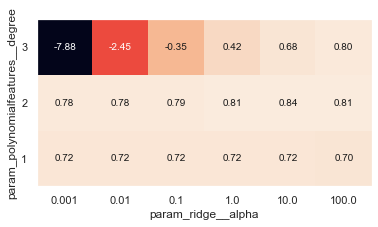

In [58]:
mglearn.tools.heatmap(pivot, xticklabels = pivot.columns, yticklabels = pivot.index, xlabel = pivot.columns.name, ylabel = pivot.index.name)

# Grid-Searching Which Model To Use

In [63]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier',  SVC())])

In [64]:
grid_params = [
    {
        'classifier' : [SVC()],
        'preprocessing' : [StandardScaler(), None]
    },
    {
        'classifier' : [RandomForestClassifier()],
        'preprocessing' : [None],
        'classifier__max_features' : [1,2,3]
    }
]

grid = GridSearchCV(pipe, grid_params, cv = 5)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 6)
grid.fit(X_train, y_train)
grid.best_params_

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

{'classifier': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
     kernel='rbf', max_iter=-1, probability=False, random_state=None,
     shrinking=True, tol=0.001, verbose=False),
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}